> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Let's look at some movies!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction

**Summary:**
TMDB Movie data will be used to examine several things. The selected data contains information from many movies and many pieces of relevant data. The object is to clean the original data into a consumable format. Then, to answer several questions and sub questions. The main questions are designed to understand a logical flow to the information, and sub questions to expand on the analysis of that data. 

## 1.) Calculating revenue of top movies
- 1a.) Which film made the most?
- 1b.) How many movies made more than $100 million?

## 2.) Duration and Profitability
- 2a.) Average duration of successful movies
- 2b.) Average profit for movies that made over $100 Million

## 3.) Most profitable year
- 3a.) Average budget of most profitable movies
- 3b.) Breakout of Genres for profitable movies


In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import pandas as pd
import numpy as np
import csv
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Slice, Dice Stril, and Fry**: We will need to dig into the data, but remove some of the junk we see so we are not confused as to what we need to do. 

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

# Once we load the file and store it, we only need the first few rows to see the kind of work we need to do. 
tmdb_core = pd.read_csv('tmdb-movies.csv')
tmdb_core.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


> **First Impression**: Woah, lots of things that we don't need here at first glance. 


### Data Cleaning (Many of these do not belong...)

> **Notice Anything?**: We don't need things like votes or directors because it does not apply to what we are looking for. 

> We need to remove keywords, homepage, votes etc. There are a few with no budget or revenue, which are irrelevant. Also, replace zeros, change date formats as well as numeric. 

> **1.) Remove Data** id, imdb_id, homepage, keywords, popularity, budget_adj, revenue_adj, overview, production_companies, vote_count, vote_average, director, homepage.

In [3]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

delete=[ 'id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'production_companies', 'vote_count', 'vote_average']

tmdb_core= tmdb_core.drop(delete,1)

# Let's take a look
tmdb_core.head(5)


,budget,revenue,original_title,cast,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,3/18/15,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,4/1/15,2015


>**2.) Removing 0's from Budget and Profit Data**

In [4]:
# We need to create new columns for budget and profit
temporary =['budget', 'revenue']

# Convert null values to removable text
tmdb_core[temporary] = tmdb_core[temporary].replace(0, np.NAN)

# Remove NA values
tmdb_core.dropna(subset = temporary, inplace = True)

rows, col = tmdb_core.shape
print('There can be only one highlander, but as of now, we have {} no. of movies because we removed the 0 values.'.format(rows-1))

There can be only one highlander, but as of now, we have 3854 no. of movies because we removed the 0 values.


>**3.) Convert dates**

In [5]:
tmdb_core.release_date = pd.to_datetime(tmdb_core['release_date'])

tmdb_core.head(5)

,budget,revenue,original_title,cast,runtime,genres,release_date,release_year
0,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,2015-03-18,2015
3,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015
4,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,2015-04-01,2015


>**4.) Convert budget/profit columns**

In [6]:
# We need to adjust the type of data we see
change=['budget', 'revenue']

tmdb_core[change]=tmdb_core[change].applymap(np.int64)

# What does this look like after we convert?
tmdb_core.dtypes

budget                     int64
revenue                    int64
original_title            object
cast                      object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

>**5.) Convert zeros in other numeric columns**

In [7]:
tmdb_core['runtime'] =tmdb_core['runtime'].replace(0, np.NAN)

# What does our data look like now?
tmdb_core.head(5)

,budget,revenue,original_title,cast,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,2015-03-18,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,2015-04-01,2015


>** 6.) Remove Duplicates**

In [8]:
# Take out duplicates if there are any
tmdb_core.drop_duplicates(keep ='first', inplace=True)
rows, col = tmdb_core.shape

print('Since we already know there can only be one Highlander, {} movies remain so we know there was only one duplicate'.format(rows-1, col))

Since we already know there can only be one Highlander, 3853 movies remain so we know there was only one duplicate


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Show me the money!) Which movies grossed the most money?

In [9]:
# need to insert some columns. 
tmdb_core.insert(5,'profit_earned',tmdb_core['revenue']-tmdb_core['budget'])

# What does our table look like now with top 5 records?
tmdb_core.head(5)

,budget,revenue,original_title,cast,runtime,profit_earned,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,1363528810,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,228436354,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,185238201,Adventure|Science Fiction|Thriller,2015-03-18,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,1868178225,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,1316249360,Action|Crime|Thriller,2015-04-01,2015


>**1a - What film made the most or least?** 1D

In [10]:
import pprint
def calculate(column):
    high= tmdb_core[column].idxmax()
    high_details=pd.DataFrame(tmdb_core.loc[high])
    
    low= tmdb_core[column].idxmin()
    low_details=pd.DataFrame(tmdb_core.loc[low])
    
    # Convert and combine data
    info=pd.concat([high_details, low_details], axis=1)
    return info

calculate('profit_earned')

,1386,2244
budget,237000000,425000000
revenue,2781505847,11087569
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
runtime,162,100
profit_earned,2544505847,-413912431
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
release_date,2009-12-10 00:00:00,2010-12-02 00:00:00
release_year,2009,2010


> We see that Avatar and The Warriors Way were the most and least profitable movies according to our data

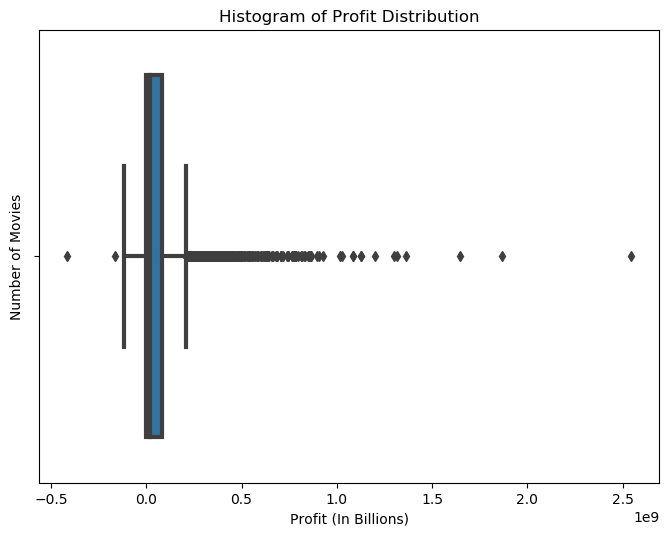

In [11]:
plt.figure(figsize=(8,6), dpi = 100)
sns.boxplot(tmdb_core['profit_earned'], linewidth = 3)

# X-axis
plt.xlabel('Profit (In Billions)', fontsize = 10)
# Y-axis
plt.ylabel('Number of Movies', fontsize = 10)
# Title
plt.title('Histogram of Profit Distribution')

plt.show()

### Recap 1a

> We see from the historgram, which was chosen to show the heavy distribution just above the break even point. In fact, that most movies barely make profit, but that there are some significant outliers. Also, you probably don't want to be the value all the way on the left. 

>**1b - How many movies made more than $100 million?** 2D

In [12]:
#selecting the movies having profit $100M or more
profit_info = tmdb_core[tmdb_core['profit_earned'] >= 100000000]

profit_info.index = range(len(profit_info))
profit_info.index = profit_info.index + 1

# let's take a look again
profit_info.head(5)

,budget,revenue,original_title,cast,runtime,profit_earned,genres,release_date,release_year
1,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,1363528810,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
2,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,228436354,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
3,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,185238201,Adventure|Science Fiction|Thriller,2015-03-18,2015
4,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,1868178225,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015
5,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,1316249360,Action|Crime|Thriller,2015-04-01,2015


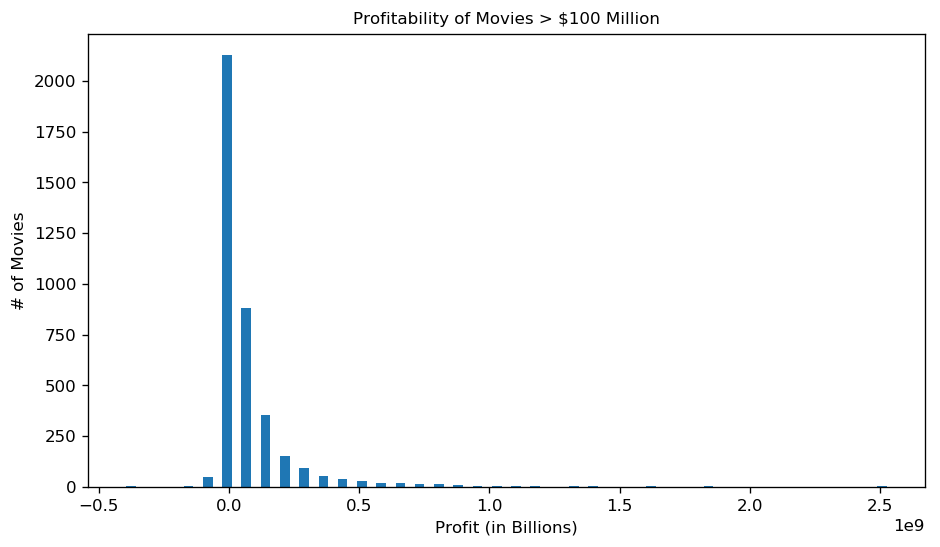

In [13]:
# Graph of movie durations and quantity
plt.figure(figsize=(9,5), dpi = 120)
plt.xlabel('Profit (in Billions)', fontsize = 10)
plt.ylabel('# of Movies', fontsize=10)
plt.title('Profitability of Movies > $100 Million', fontsize=10)

# Plot and render data
plt.hist(tmdb_core['profit_earned'], rwidth = .5, bins =40)
plt.show()

> A bar chart was chosen to show the huge skewed distribution that MOST movies do not make alot of money. Movies beyond 200 million in profit are few and far between. 

### Recap 1b

> We can see from the plot, that when we set the criteria at 100 million +, the results are more concise. How this differs from the histogram above is we filtered the data to number of movies that fit the 100 million + criteria.

> Also, 826 movies fit this criteria in our data set. 

In [14]:
len(profit_info)

826

### Research Question 2  (Duration and Profitability)

In [15]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.

# Create to calculate duration
def avgdur(column):
    return tmdb_core[column].mean()

avgdur('runtime')

109.22029060716139

> Average duration of profitable movies is 109 minutes

> **2a - Analysis of Average Duration** 2D

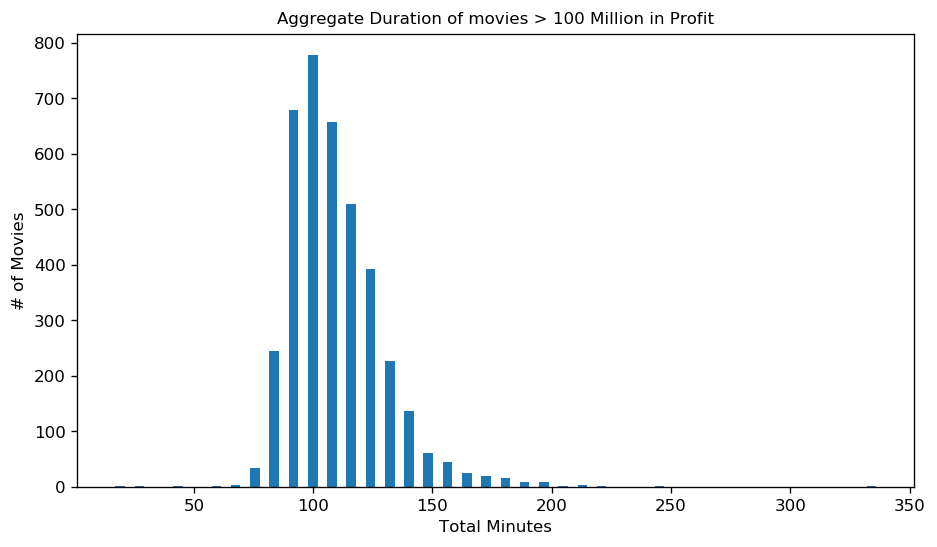

In [22]:
# Graph of movie durations and quantity
plt.figure(figsize=(9,5), dpi = 120)
plt.xlabel('Total Minutes', fontsize = 10)
plt.ylabel('# of Movies', fontsize=10)
plt.title('Aggregate Duration of movies > 100 Million in Profit', fontsize=10)

# Plot and render data
plt.hist(tmdb_core['runtime'], rwidth = .5, bins =40)
plt.show()

> A bar chart was chosen to clearly show the distribution of sucessful movies. This way the reader can see virtually no movies longer than 200 minutes are sucessful. But, there are some. 

### Recap 2a

> The plot above shows that, when you consider movies which are greater than 100 million in profit, what is the average duration of those movies? Quantity of profit is irrelevant at this point. 

> Again, the average is 109 minutes

>**2b - Average profit of top movies**

In [17]:
def profitavg(column):
    return profit_info[column].mean()

print('Average profit of movies that earned more than 100 million dollars')
profitavg('revenue')

Average profit of movies that earned more than 100 million dollars


345328046.81961256

> Average profit is 345 million

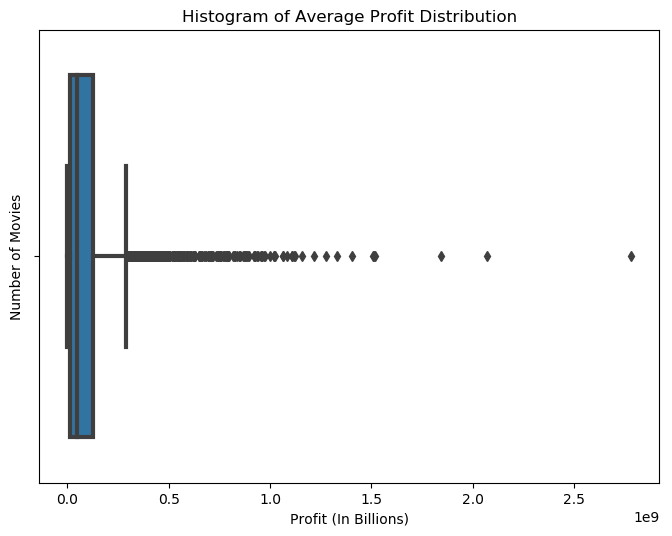

In [24]:
plt.figure(figsize=(8,6), dpi = 100)
sns.boxplot(tmdb_core['revenue'], linewidth = 3)

# X-axis
plt.xlabel('Profit (In Billions)', fontsize = 10)
# Y-axis
plt.ylabel('Number of Movies', fontsize = 10)
# Title
plt.title('Histogram of Average Profit Distribution')

plt.show()

### Recap 2b

> The histogram shows, and a histogram was chosen to show the clustering of values at the bottom and the few values as outliers. There are many movies that balance out the serious outliers like Avatar. The clustering is at the bottom, but the average is still clear of profit at 345 Million. Avatar is skewing the data slightly so we can assume the average is slightly higher than reality.

### Research Question 3 (Which year was the most profitable for movies in general)

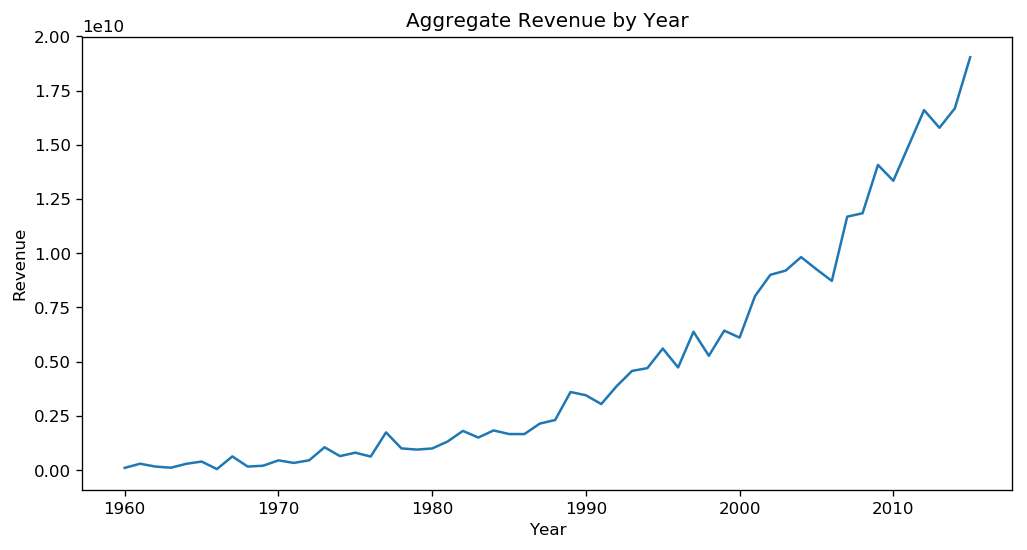

Most profitable year


2015

In [18]:
# Graph of how much movies made year over year
profits_year = tmdb_core.groupby('release_year')['profit_earned'].sum()

plt.figure(figsize=(10,5), dpi = 120)
plt.xlabel('Year', fontsize = 10)
plt.ylabel('Revenue', fontsize = 10)
plt.title('Aggregate Revenue by Year')

# Plot and render data
plt.plot(profits_year)
plt.show()

print('Most profitable year')
profits_year.idxmax()

> A line chart was chosen to highlight the upward trend clearly and to coincide with the title. There should be no mistake that there is a trend. 

> **3a - Average Budget of Most Profitable Movies**

In [19]:
# Creating new formula to return average 
def profitavg(column):
    return profit_info[column].mean()

In [20]:
# Calculate the average budget for movies that gross more than $100 million
profitavg('budget')

74469572.77602905

### Recap 3a

> The graph clearly shows an upward trend with only a few dips. What's interesting to note is you can see the dip in revenue for 2008-9 because of the recession. Either that or there were wayy too many Matthew McConaughey / Kate hudson romantic comedies those years. 

>**3b - Breakout of Genres for profitable movies**

In [39]:
#function which will take any column as argument from and keep its track 
def data(column):
    #will take a column, and separate the string by '|'
    data = profit_info[column].str.cat(sep = '|')
    
    #giving pandas series and storing the values separately
    data = pd.Series(data.split('|'))
    
    #arranging in descending order
    count = data.value_counts(ascending = False)
    
    return count

In [43]:
#variable to store the retured value
count = data('genres')
#printing top 5 values
print(data('genres'))

Action             317
Comedy             299
Adventure          278
Drama              264
Thriller           233
Family             166
Science Fiction    148
Fantasy            144
Romance            132
Crime              112
Animation          102
Mystery             66
Horror              55
Music               31
War                 29
History             14
Western             10
Documentary          1
dtype: int64


> We can see that we have more movies than our original list of profitable movies. Therefore, we have to separate films with multiple genres associated in our data. We should plot these to determine if there are any correlations between sucessful films (100 million or more) and certain genres. 

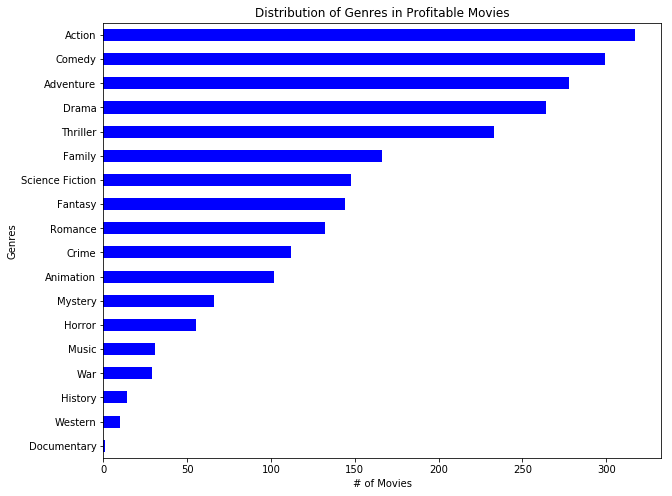

In [53]:
# We need to sort the values 
count.sort_values(ascending = True, inplace = True)

lt = count.plot.barh(color = 'blue', fontsize = 10)
lt.set(title = 'Distribution of Genres in Profitable Movies')

# on x axis
lt.set_xlabel('# of Movies', color = 'black', fontsize = '10')
# on y axis
lt.set_ylabel('Genres', color = 'black', fontsize = '10')

# Plot paramaters
lt.figure.set_size_inches(10, 8)
plt.show()

### Recap 3b

> Given the plot above, a bar chart was chosen to highlight the cascade of qualifying genres. This way we can quickly see the top genres. We can see that Action and Comedy movies are the top genres that have been the most sucessful in the 100 million + category. This is actually not a suprise considering how every movie coming out these days is a superhero movie. 

<a id='conclusions'></a>
# Conclusions

>Digging into aggregate movie data can be eye opening how much money is required to produce and deliver. Also, equally as eye opening is the amount of money to be made with a sucessful movie. Suffice to say, you need to spend money to make money. 

>**Limitations:** The bar was set high at 100 million for the overall analysis. Movies that make more than they cost are still a sucess (no kidding). However, according to some that may not be the case. Therefore, we may have assumed a sucessful movie made way more than required to be considered sucessful. Personally, i prefer the John Hughes movies way more than some of these top grossing ones. Well, Jurassic park is pretty cool too. Another limitation is the data set is missing the last few years. It would be interesting to see if the upward trend for profitability is sustained in 2016-17.

>Conclusions below:
1. There is a general upward trend in budget and return for movies as the years progress.
2. Higest grossing movie was Avatar with 2.5 Billion in profit.
3. 826 movies have exceeded 100 million in profit.
4. Average duration of sucessful movies is 109.22 minutes.
5. Average profit of sucessful movies is 345 million.
6. Most profitable year is 2015
7. The average budget of all movies that grossed more than 100 million was 74.5 million.
